In [1]:
#importing all libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading dat file

movies=pd.read_table("/content/movies.dat",sep="::",encoding="unicode_escape",header=None)

#observe 1st 5 rows of data set

movies.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
#assigning the columns to data set

movies.columns=["movieID","Title","geners"]
movies.head()

,movieID,Title,geners
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
#reading ratings data set

rating=pd.read_table("/content/ratings.dat",sep="::",encoding="unicode_escape",header=None)

#observe 1st 5 rows of data set

rating.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
#assigning the columns to data set

rating.columns=["userID","movieID","Rating","Timestamp"]
rating.head()

,userID,movieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
 #reading the users data set
    
users=pd.read_csv("/content/users.dat",sep="::",encoding="unicode_escape",header=None)

#observe the 1st 5 rows of data set

users.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
# assigning the columns to data set

users.columns=["userID","Gender","Age","Occupation","zip-code"]
users.head()

,userID,Gender,Age,Occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
#combining the movies and rating on movieID

combine=movies.merge(rating,on='movieID',how='inner')
combine.head()

,movieID,Title,geners,userID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [9]:
#merging users to data set

combine_1=combine.merge(users,on='userID',how='inner')
combine_1.head()

,movieID,Title,geners,userID,Rating,Timestamp,Gender,Age,Occupation,zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [10]:
combine_1.columns

Index(['movieID', 'Title', 'geners', 'userID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'zip-code'],
      dtype='object')

In [11]:
#create master_data with selective columns

master_data=combine_1[{'movieID','Title','userID','Age','Gender','Occupation','Rating'}]
master_data.head()

,Title,Rating,Gender,Occupation,userID,Age,movieID
0,Toy Story (1995),5,F,10,1,1,1
1,Pocahontas (1995),5,F,10,1,1,48
2,Apollo 13 (1995),5,F,10,1,1,150
3,Star Wars: Episode IV - A New Hope (1977),4,F,10,1,1,260
4,Schindler's List (1993),5,F,10,1,1,527


In [12]:
#couting the age

master_data['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


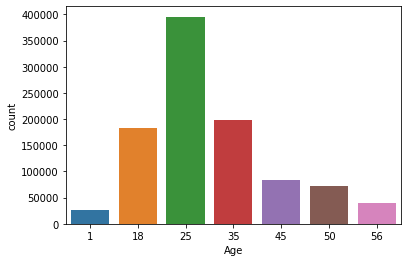

In [13]:
#plotting graph of age distributution

sns.countplot('Age',data=master_data)

In [14]:
#create  data set that contains only toystory

toystory_rating=master_data[master_data['Title'].str.contains('Toy Story')==True]
toystory_rating

,Title,Rating,Gender,Occupation,userID,Age,movieID
0,Toy Story (1995),5,F,10,1,1,1
50,Toy Story 2 (1999),4,F,10,1,1,3114
53,Toy Story (1995),4,F,9,6,50,1
124,Toy Story (1995),4,M,12,8,25,1
263,Toy Story (1995),5,M,17,9,25,1
...,...,...,...,...,...,...,...
998988,Toy Story 2 (1999),4,F,7,3023,25,3114
999027,Toy Story 2 (1999),5,M,18,5800,35,3114
999486,Toy Story 2 (1999),4,M,10,2189,1,3114
999869,Toy Story 2 (1999),4,F,0,159,45,3114


In [15]:
toystory_rating.groupby(['Title','Rating']).size()

Title               Rating
Toy Story (1995)    1          16
                    2          61
                    3         345
                    4         835
                    5         820
Toy Story 2 (1999)  1          25
                    2          44
                    3         214
                    4         578
                    5         724
dtype: int64

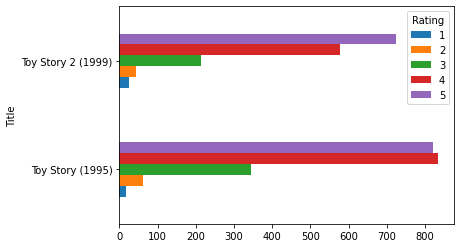

In [16]:
#plotting graph of toystory with ratings

toystory_rating.groupby(['Title','Rating']).size().unstack().plot(kind='barh',stacked=False,legend=True)
plt.show()

In [17]:
#create data set having top 25 rated movies

viewer_rating=master_data.groupby('Title').size().sort_values(ascending=False)[:25]
viewer_rating

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

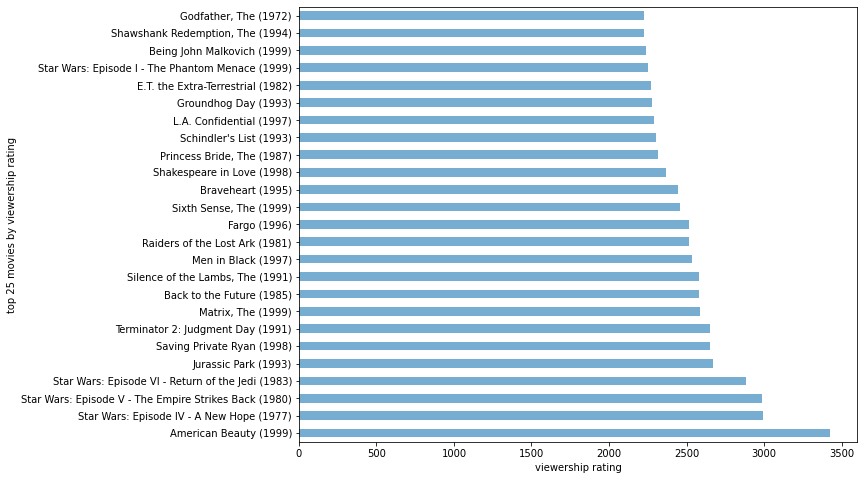

In [18]:
#plotting graph of top 25 movies with ratings

viewer_rating.plot(kind='barh',alpha=0.6,figsize=(10,8))
plt.xlabel("viewership rating")
plt.ylabel("top 25 movies by viewership rating")
plt.show()

In [19]:
#select 2696 user id 

userID=2696
rating_userID=master_data[master_data['userID']==userID]
rating_userID

,Title,Rating,Gender,Occupation,userID,Age,movieID
991035,"Client, The (1994)",3,M,7,2696,25,350
991036,Lone Star (1996),5,M,7,2696,25,800
991037,Basic Instinct (1992),4,M,7,2696,25,1092
991038,E.T. the Extra-Terrestrial (1982),3,M,7,2696,25,1097
991039,"Shining, The (1980)",4,M,7,2696,25,1258
991040,Back to the Future (1985),2,M,7,2696,25,1270
991041,Cop Land (1997),3,M,7,2696,25,1589
991042,L.A. Confidential (1997),4,M,7,2696,25,1617
991043,"Game, The (1997)",4,M,7,2696,25,1625
991044,I Know What You Did Last Summer (1997),2,M,7,2696,25,1644


In [20]:
#feature engineering
#finding unique geners

geners=combine_1['geners'].str.split("or")
geners

0                   [Animation|Children's|Comedy]
1          [Animation|Children's|Musical|Romance]
2                                         [Drama]
3               [Action|Adventure|Fantasy|Sci-Fi]
4                                     [Drama|War]
                            ...                  
1000204                          [Drama|Thriller]
1000205                  [Comedy|H, r, |Thriller]
1000206                          [Comedy|Romance]
1000207                         [Action|Thriller]
1000208                            [Action|Drama]
Name: geners, Length: 1000209, dtype: object

In [21]:
list_geners=set()
for genere in geners:
    list_geners=list_geners.union(set(genere))
list_geners

{'',
 'Action',
 'Action|Adventure',
 'Action|Adventure|Animation',
 "Action|Adventure|Animation|Children's|Fantasy",
 'Action|Adventure|Animation|H',
 "Action|Adventure|Children's",
 "Action|Adventure|Children's|Comedy",
 "Action|Adventure|Children's|Fantasy",
 "Action|Adventure|Children's|Sci-Fi",
 'Action|Adventure|Comedy',
 'Action|Adventure|Comedy|Crime',
 'Action|Adventure|Comedy|H',
 'Action|Adventure|Comedy|Romance',
 'Action|Adventure|Comedy|Sci-Fi',
 'Action|Adventure|Comedy|War',
 'Action|Adventure|Crime',
 'Action|Adventure|Crime|Drama',
 'Action|Adventure|Crime|Thriller',
 'Action|Adventure|Drama',
 'Action|Adventure|Drama|Romance',
 'Action|Adventure|Drama|Sci-Fi|War',
 'Action|Adventure|Drama|Thriller',
 'Action|Adventure|Fantasy',
 'Action|Adventure|Fantasy|Sci-Fi',
 'Action|Adventure|H',
 'Action|Adventure|Mystery',
 'Action|Adventure|Mystery|Sci-Fi',
 'Action|Adventure|Romance',
 'Action|Adventure|Romance|Sci-Fi|War',
 'Action|Adventure|Romance|Thriller',
 'Action|Adv

In [22]:
# one hot encoding
ratingonehot=combine_1['geners'].str.get_dummies("|")
ratingonehot.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [23]:
df_master=pd.concat([combine_1,ratingonehot],axis=1)
df_master.head()

,movieID,Title,geners,userID,Rating,Timestamp,Gender,Age,Occupation,zip-code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0


In [24]:
df_master_1=df_master[['Title','Year']]=master_data.Title.str.extract("(.)\s\((.\d+)",expand=True)


In [25]:
df_master_1=df_master.drop(columns=['Title'])
df_master_1.head()

,movieID,geners,userID,Rating,Timestamp,Gender,Age,Occupation,zip-code,Action,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,1,Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,1995
1,48,Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,0,...,0,0,1,0,1,0,0,0,0,1995
2,150,Drama,1,5,978301777,F,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,1995
3,260,Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,1,...,0,0,0,0,0,1,0,0,0,1977
4,527,Drama|War,1,5,978824195,F,1,10,48067,0,...,0,0,0,0,0,0,0,1,0,1993


In [26]:
df_master_1['Year']=df_master.Year.astype(int)
df_master_1.head()


,movieID,geners,userID,Rating,Timestamp,Gender,Age,Occupation,zip-code,Action,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,1,Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,1995
1,48,Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,0,...,0,0,1,0,1,0,0,0,0,1995
2,150,Drama,1,5,978301777,F,1,10,48067,0,...,0,0,0,0,0,0,0,0,0,1995
3,260,Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,1,...,0,0,0,0,0,1,0,0,0,1977
4,527,Drama|War,1,5,978824195,F,1,10,48067,0,...,0,0,0,0,0,0,0,1,0,1993


In [27]:
df_master_1["Movie_Age"]=2000-df_master_1.Year
df_master_1.head()

,movieID,geners,userID,Rating,Timestamp,Gender,Age,Occupation,zip-code,Action,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,0,...,0,0,0,0,0,0,0,0,1995,5
1,48,Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,0,...,0,1,0,1,0,0,0,0,1995,5
2,150,Drama,1,5,978301777,F,1,10,48067,0,...,0,0,0,0,0,0,0,0,1995,5
3,260,Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,1,...,0,0,0,0,1,0,0,0,1977,23
4,527,Drama|War,1,5,978824195,F,1,10,48067,0,...,0,0,0,0,0,0,1,0,1993,7


In [28]:
df_master_1['Gender']=df_master_1['Gender'].replace({"F":0,"M":1})
df_master_1.head()

,movieID,geners,userID,Rating,Timestamp,Gender,Age,Occupation,zip-code,Action,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Animation|Children's|Comedy,1,5,978824268,0,1,10,48067,0,...,0,0,0,0,0,0,0,0,1995,5
1,48,Animation|Children's|Musical|Romance,1,5,978824351,0,1,10,48067,0,...,0,1,0,1,0,0,0,0,1995,5
2,150,Drama,1,5,978301777,0,1,10,48067,0,...,0,0,0,0,0,0,0,0,1995,5
3,260,Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,0,1,10,48067,1,...,0,0,0,0,1,0,0,0,1977,23
4,527,Drama|War,1,5,978824195,0,1,10,48067,0,...,0,0,0,0,0,0,1,0,1993,7


In [29]:
df_gender_affect=df_master_1.groupby('Gender').size().sort_values(ascending=False)[:25]

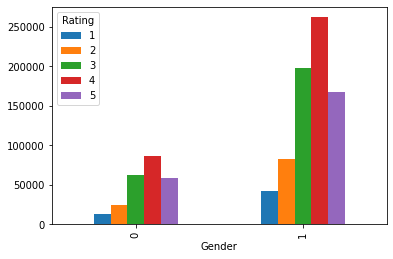

In [30]:
# plotting graph of different columns which effect ratings 

df_master_1.groupby(['Gender','Rating']).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

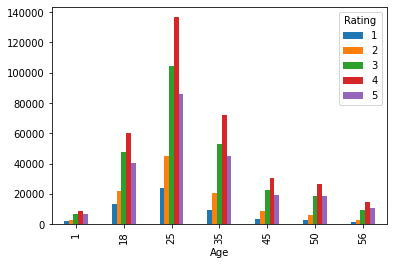

In [31]:
from matplotlib import legend
df_master_1.groupby(['Age','Rating']).size().unstack().plot(kind='bar',stacked=False,legend=True)

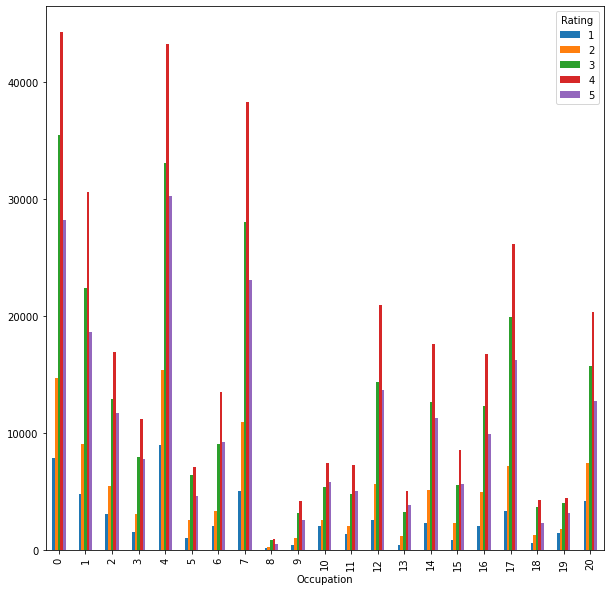

In [32]:
df_master_1.groupby(['Occupation','Rating']).size().unstack().plot(figsize=(10,10),kind='bar',stacked=False,legend=True)
plt.show()

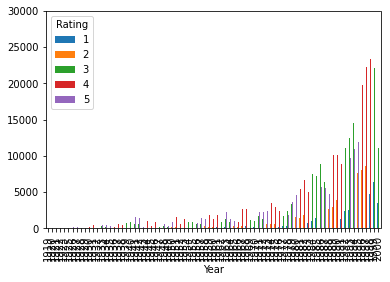

In [33]:
df_master_1.groupby(['Year','Rating']).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

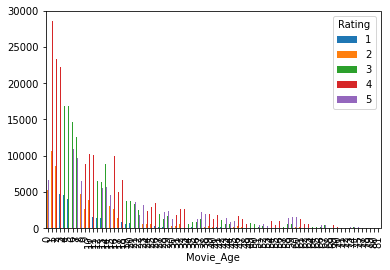

In [34]:
df_master_1.groupby(['Movie_Age','Rating']).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

In [35]:
df_master.head()

,movieID,Title,geners,userID,Rating,Timestamp,Gender,Age,Occupation,zip-code,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,1,y,Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,1995
1,48,s,Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,1,0,1,0,0,0,0,1995
2,150,3,Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,1995
3,260,e,Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,0,0,0,0,0,1,0,0,0,1977
4,527,t,Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,1,0,1993


In [66]:
df_master_1.head()

,movieID,geners,userID,Rating,Timestamp,Gender,Age,Occupation,zip-code,Action,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Animation|Children's|Comedy,1,5,978824268,0,1,10,48067,0,...,0,0,0,0,0,0,0,0,1995,5
1,48,Animation|Children's|Musical|Romance,1,5,978824351,0,1,10,48067,0,...,0,1,0,1,0,0,0,0,1995,5
2,150,Drama,1,5,978301777,0,1,10,48067,0,...,0,0,0,0,0,0,0,0,1995,5
3,260,Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,0,1,10,48067,1,...,0,0,0,0,1,0,0,0,1977,23
4,527,Drama|War,1,5,978824195,0,1,10,48067,0,...,0,0,0,0,0,0,1,0,1993,7


In [36]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 29 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   movieID      1000209 non-null  int64 
 1   Title        1000209 non-null  object
 2   geners       1000209 non-null  object
 3   userID       1000209 non-null  int64 
 4   Rating       1000209 non-null  int64 
 5   Timestamp    1000209 non-null  int64 
 6   Gender       1000209 non-null  object
 7   Age          1000209 non-null  int64 
 8   Occupation   1000209 non-null  int64 
 9   zip-code     1000209 non-null  object
 10  Action       1000209 non-null  int64 
 11  Adventure    1000209 non-null  int64 
 12  Animation    1000209 non-null  int64 
 13  Children's   1000209 non-null  int64 
 14  Comedy       1000209 non-null  int64 
 15  Crime        1000209 non-null  int64 
 16  Documentary  1000209 non-null  int64 
 17  Drama        1000209 non-null  int64 
 18  Fantasy      1000209 n

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_master[['Title','geners','zip-code']]=df_master[['Title','geners','zip-code']].apply(le.fit_transform)
print(df_master[['Title','geners','zip-code']])

         Title  geners  zip-code
0           46     145      1588
1           40     153      1588
2            7     239      1588
3           28      24      1588
4           41     262      1588
...        ...     ...       ...
1000204     41     260      2991
1000205     37     200      2991
1000206     31     207      2991
1000207      5      92      2991
1000208     39      64      2991

[1000209 rows x 3 columns]


In [60]:
# converting gender column  string to integer
 df_master['Gender']=[ 1 if x=='M'  else 0 for x in df_master['Gender']]
df_master.head()

,movieID,Title,geners,userID,Rating,Timestamp,Gender,Age,Occupation,zip-code,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,1,46,145,1,5,978824268,0,1,10,1588,...,0,0,0,0,0,0,0,0,0,1995
1,48,40,153,1,5,978824351,0,1,10,1588,...,0,0,1,0,1,0,0,0,0,1995
2,150,7,239,1,5,978301777,0,1,10,1588,...,0,0,0,0,0,0,0,0,0,1995
3,260,28,24,1,4,978300760,0,1,10,1588,...,0,0,0,0,0,1,0,0,0,1977
4,527,41,262,1,5,978824195,0,1,10,1588,...,0,0,0,0,0,0,0,1,0,1993


In [80]:
#creating X & Y label for Training and testing

x=df_master.drop(["Rating","geners"],axis=1)
y=df_master['Rating']
x.head()



,movieID,Title,userID,Timestamp,Gender,Age,Occupation,zip-code,Action,Adventure,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year
0,1,46,1,978824268,0,1,10,1588,0,0,...,0,0,0,0,0,0,0,0,0,1995
1,48,40,1,978824351,0,1,10,1588,0,0,...,0,0,1,0,1,0,0,0,0,1995
2,150,7,1,978301777,0,1,10,1588,0,0,...,0,0,0,0,0,0,0,0,0,1995
3,260,28,1,978300760,0,1,10,1588,1,1,...,0,0,0,0,0,1,0,0,0,1977
4,527,41,1,978824195,0,1,10,1588,0,0,...,0,0,0,0,0,0,0,1,0,1993


In [76]:
#importing model  and accuracy score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [77]:
# splitting data in to Train and Test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [78]:
# model for Training
model=LogisticRegression()
model=model.fit(x_train,y_train)
score=model.score(x_test,y_test)



In [79]:
#Prediction of score
score

0.3491266833964867